In [ ]:
import yfinance as yf
import pandas as pd
import datetime

def get_nasdaq_data(start_date, end_date):
  """
  Fetches NASDAQ composite index closing prices from Yahoo Finance.

  Args:
    start_date: Start date of the data.
    end_date: End date of the data.

  Returns:
    pandas DataFrame containing the NASDAQ closing prices.
  """

  # NASDAQ composite index ticker
  nasdaq_ticker = "^IXIC"

  # Create a date range
  start_date = datetime.datetime(start_date, 1, 1)
  end_date = datetime.datetime(end_date, 12, 31)

  # Fetch data
  data = yf.download(nasdaq_ticker, start=start_date, end=end_date)

  return data

# Example usage
start_year = 2004  # Starting year
end_year = 2023  # Ending year

nasdaq_data = get_nasdaq_data(start_year, end_year)

print(nasdaq_data.head())
print(nasdaq_data.tail())


[*********************100%%**********************]  1 of 1 completed


                   Open         High          Low        Close    Adj Close  \
Date2                                                                         
2004-01-02  2011.079956  2022.369995  1999.770020  2006.680054  2006.680054   
2004-01-05  2020.780029  2047.359985  2020.780029  2047.359985  2047.359985   
2004-01-06  2044.550049  2061.540039  2039.630005  2057.370117  2057.370117   
2004-01-07  2056.750000  2078.090088  2047.020020  2077.679932  2077.679932   
2004-01-08  2089.600098  2100.250000  2078.050049  2100.250000  2100.250000   

                Volume  running_average  
Date2                                    
2004-01-02  1666780000              NaN  
2004-01-05  2362910000              NaN  
2004-01-06  2273220000              NaN  
2004-01-07  2294280000              NaN  
2004-01-08  2683950000              NaN  
                             Open          High           Low         Close  \
Date2                                                                    

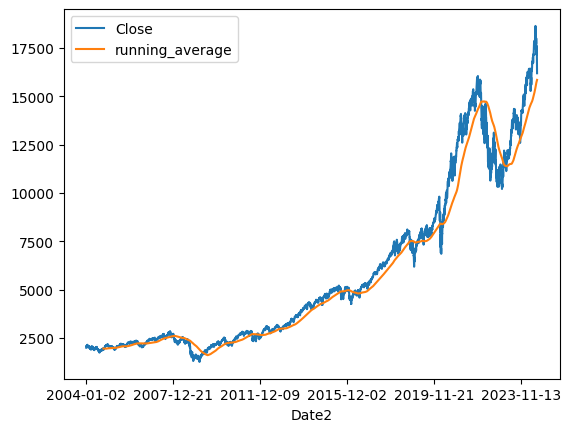

In [27]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

def get_nasdaq_data(start_date, end_date):
    """
    Fetches NASDAQ composite index closing prices from Yahoo Finance.

    Args:
        start_date: Start date of the data.
        end_date: End date of the data.

    Returns:
        pandas DataFrame containing the NASDAQ closing prices.
    """

    # NASDAQ composite index ticker
    nasdaq_ticker = "^IXIC"

    # Create a date range
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")

    # Fetch data
    data = yf.download(nasdaq_ticker, start=start_date, end=end_date)

    return data

nasdaq_data = pd.read_csv('nasdaq_data.csv', index_col=0, skiprows=lambda x: x >= len(nasdaq_data) - 10)

# Example usage
latest_date = pd.to_datetime(nasdaq_data.index[-1]).date()  # Get the latest date from the collected data
today = datetime.today().date()

start_date = latest_date.strftime("%Y-%m-%d")
end_date = today.strftime("%Y-%m-%d")

nasdaq_data_new = get_nasdaq_data(start_date, end_date)

combined_data = pd.concat([nasdaq_data, nasdaq_data_new])

# Sort the combined data by date
#combined_data = combined_data.sort_index()

combined_data.to_csv('nasdaq_data.csv')

combined_data['running_average'] = combined_data['Close'].rolling(window=200).mean()

combined_data['Date2'] = combined_data.index
combined_data.set_index('Date2', inplace=True)
combined_data.plot(y=['Close', 'running_average'], legend=True)

print(combined_data.head())
print(combined_data.tail())

